In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy.interpolate import LinearNDInterpolator

After applying PCA on your data to get principal components, dataset looks like a 3D blob, not a surface. Your first example show a 3D surface with extra 1D color scale that definitely looks like `z=f(x,y)`, but your data does not looks like a surface even not to `f(x,y,z)=0`. Can you pin down what 

In [2]:
data = pd.read_csv("Data_4D_plot.csv")

In [3]:
y = data.pop("C").values
X = data.values

In [4]:
pca = PCA()
Xp = pca.fit_transform(X)

(-400.0, 400.0)

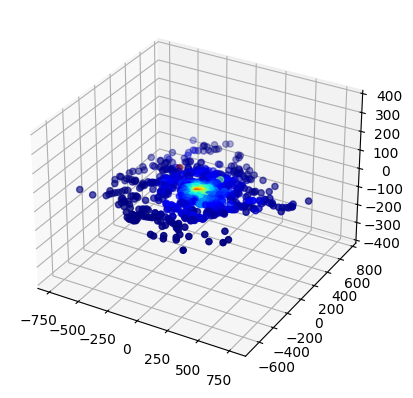

In [5]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.scatter(*Xp.T, c=y, cmap="jet")
axe.set_zlim([-400, 400])

In [6]:
xmin = Xp.min(axis=0)
xmax = Xp.max(axis=0)

In [7]:
xlin = np.linspace(xmin[0], xmax[0], 200)
ylin = np.linspace(xmin[1], xmax[1], 200)
Xlin, Ylin = np.meshgrid(xlin, ylin)

In [8]:
height_interpolant = LinearNDInterpolator(Xp[:,:-1], Xp[:,-1])

In [9]:
Zlin = height_interpolant(np.array([Xlin.ravel(), Ylin.ravel()]).T)
Zlin = Zlin.reshape(Xlin.shape)

In [10]:
level_interpolant = LinearNDInterpolator(Xp, y)

In [11]:
Clin = level_interpolant(np.array([Xlin.ravel(), Ylin.ravel(), Zlin.ravel()]).T)
Clin = Clin.reshape(Xlin.shape)

(-400.0, 400.0)

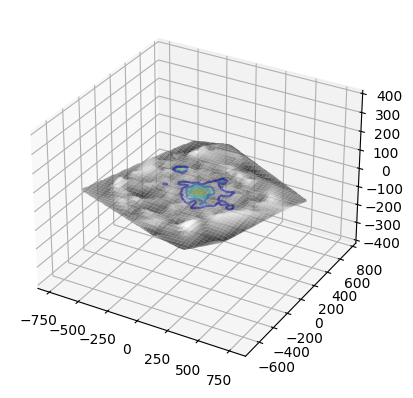

In [12]:
fig, axe = plt.subplots(subplot_kw={"projection": "3d"})
axe.plot_surface(Xlin, Ylin, Zlin, cmap="gray", alpha=0.75)
axe.contour(Xlin, Ylin, Clin, cmap="jet")
axe.set_zlim([-400, 400])

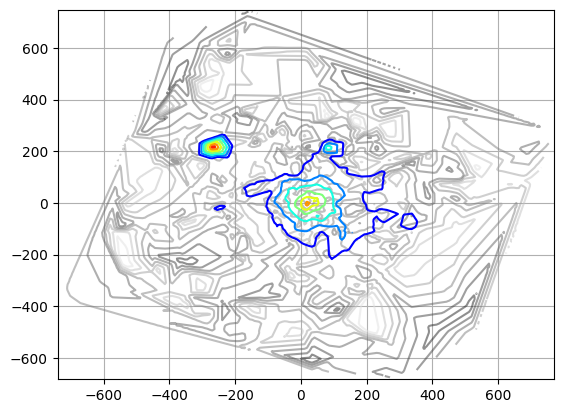

In [13]:
fig, axe = plt.subplots()
axe.contour(Xlin, Ylin, Zlin, cmap="gray", alpha=0.5)
axe.contour(Xlin, Ylin, Clin, cmap="jet")
axe.grid()